In [1]:
# import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler

## 0. Read data

In [2]:
df = pd.read_csv('../data/spotify_clean.csv')

In [3]:
df.head()

,Unnamed: 0,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity_class,duration_s
0,0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,Very Low,99.373
1,1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,Very Low,137.373
2,2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,Very Low,170.267
3,3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,Very Low,152.427
4,4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,Very Low,82.625


In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df['time_signature'].unique()

array(['4/4', '5/4', '3/4', '1/4', '0/4'], dtype=object)

In [6]:
df['key'].nunique()

12

### 1. Drop the useless columns

In [7]:
df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence', 'popularity_class', 'duration_s'],
      dtype='object')

In [7]:
df_1 = df.drop(columns=['genre', 'artist_name', 'track_name', 'track_id', 'popularity'])

In [8]:
df_1.columns

Index(['acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence', 'popularity_class', 'duration_s'],
      dtype='object')

### 2. Transform to dummy

In [9]:
df_1.dtypes

acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
popularity_class     object
duration_s          float64
dtype: object

In [10]:
df_1['key'].nunique()

12

In [11]:
df_1['time_signature'].nunique()

5

In [12]:




df_1['mode'].nunique()

2

In [13]:
df_1['popularity_class'].nunique() # variable to predict

5

In [14]:
df_trans = pd.get_dummies(df_1, columns=['key','time_signature', 'mode'])

In [15]:
df_trans

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity_class,...,key_F#,key_G,key_G#,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4,mode_Major,mode_Minor
0,0.61100,0.389,0.910,0.000000,0.3460,-1.828,0.0525,166.969,0.814,Very Low,...,False,False,False,False,False,False,True,False,True,False
1,0.24600,0.590,0.737,0.000000,0.1510,-5.559,0.0868,174.003,0.816,Very Low,...,True,False,False,False,False,False,True,False,False,True
2,0.95200,0.663,0.131,0.000000,0.1030,-13.879,0.0362,99.488,0.368,Very Low,...,False,False,False,False,False,False,False,True,False,True
3,0.70300,0.240,0.326,0.000000,0.0985,-12.178,0.0395,171.758,0.227,Very Low,...,False,False,False,False,False,False,True,False,True,False
4,0.95000,0.331,0.225,0.123000,0.2020,-21.150,0.0456,140.576,0.390,Very Low,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232719,0.00384,0.687,0.714,0.544000,0.0845,-10.626,0.0316,115.542,0.962,Low,...,False,False,False,False,False,False,True,False,True,False
232720,0.03290,0.785,0.683,0.000880,0.2370,-6.944,0.0337,113.830,0.969,Low,...,False,False,False,False,False,False,True,False,False,True
232721,0.90100,0.517,0.419,0.000000,0.0945,-8.282,0.1480,84.135,0.813,Low,...,False,False,False,False,False,False,True,False,True,False
232722,0.26200,0.745,0.704,0.000000,0.3330,-7.137,0.1460,100.031,0.489,Low,...,False,False,False,False,False,False,True,False,True,False


### 3. Perform Train Test Split

In [16]:
features = df_trans.drop(columns=["popularity_class"], axis = 1)
target = df_trans["popularity_class"]

In [17]:
features

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_s,...,key_F#,key_G,key_G#,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4,mode_Major,mode_Minor
0,0.61100,0.389,0.910,0.000000,0.3460,-1.828,0.0525,166.969,0.814,99.373,...,False,False,False,False,False,False,True,False,True,False
1,0.24600,0.590,0.737,0.000000,0.1510,-5.559,0.0868,174.003,0.816,137.373,...,True,False,False,False,False,False,True,False,False,True
2,0.95200,0.663,0.131,0.000000,0.1030,-13.879,0.0362,99.488,0.368,170.267,...,False,False,False,False,False,False,False,True,False,True
3,0.70300,0.240,0.326,0.000000,0.0985,-12.178,0.0395,171.758,0.227,152.427,...,False,False,False,False,False,False,True,False,True,False
4,0.95000,0.331,0.225,0.123000,0.2020,-21.150,0.0456,140.576,0.390,82.625,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232719,0.00384,0.687,0.714,0.544000,0.0845,-10.626,0.0316,115.542,0.962,326.240,...,False,False,False,False,False,False,True,False,True,False
232720,0.03290,0.785,0.683,0.000880,0.2370,-6.944,0.0337,113.830,0.969,282.447,...,False,False,False,False,False,False,True,False,False,True
232721,0.90100,0.517,0.419,0.000000,0.0945,-8.282,0.1480,84.135,0.813,166.960,...,False,False,False,False,False,False,True,False,True,False
232722,0.26200,0.745,0.704,0.000000,0.3330,-7.137,0.1460,100.031,0.489,222.442,...,False,False,False,False,False,False,True,False,True,False


In [18]:
target

0         Very Low
1         Very Low
2         Very Low
3         Very Low
4         Very Low
            ...   
232719         Low
232720         Low
232721         Low
232722         Low
232723         Low
Name: popularity_class, Length: 232724, dtype: object

In [19]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

### 4. Model Selection

#### 4.1 k-NN

In [20]:
number_of_neighbours = 15

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=number_of_neighbours)

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [23]:
knn.score(X_test, y_test)

0.5131593081963691

In [26]:
l = []
for i in range(10,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    r2 = knn.score(X_test, y_test)
    l.append(r2)
    
    
    print(f"k = {i}  || R^2 = {r2}")



k = 10  || R^2 = 0.5194757761306262
k = 11  || R^2 = 0.5148136212267698
k = 12  || R^2 = 0.5142765066065098
k = 13  || R^2 = 0.5126651627457299
k = 14  || R^2 = 0.5130948544419379
k = 15  || R^2 = 0.5131593081963691
k = 16  || R^2 = 0.5115049951659684
k = 17  || R^2 = 0.5112471801482437
k = 18  || R^2 = 0.5114405414115373
k = 19  || R^2 = 0.508840906649479
k = 20  || R^2 = 0.5098721667203782
k = 21  || R^2 = 0.5090772370823934
k = 22  || R^2 = 0.5084971532925127
k = 23  || R^2 = 0.5099151358899989
k = 24  || R^2 = 0.5095498979482221
k = 25  || R^2 = 0.508948329573531
k = 26  || R^2 = 0.5086045762165646
k = 27  || R^2 = 0.5077022236545279
k = 28  || R^2 = 0.5072940165431303
k = 29  || R^2 = 0.505983456869696
k = 30  || R^2 = 0.5065635406595768
k = 31  || R^2 = 0.5061123643785583
k = 32  || R^2 = 0.5063916639810936
k = 33  || R^2 = 0.5068428402621119
k = 34  || R^2 = 0.5062197873026104
k = 35  || R^2 = 0.5047373509506928
k = 36  || R^2 = 0.5051025888924696
k = 37  || R^2 = 0.505876033945

KeyboardInterrupt: 

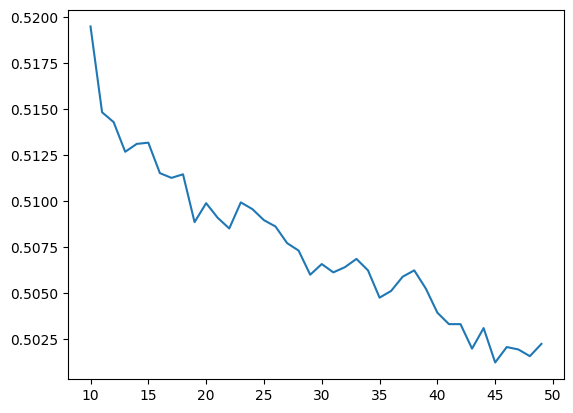

In [26]:
plt.plot(list(range(10,50)), l)

In [27]:
l = []
for i in range(3,12):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    r2 = knn.score(X_test, y_test)
    l.append(r2)
    
    
    print(f"k = {i}  || R^2 = {r2}")

: 

: 

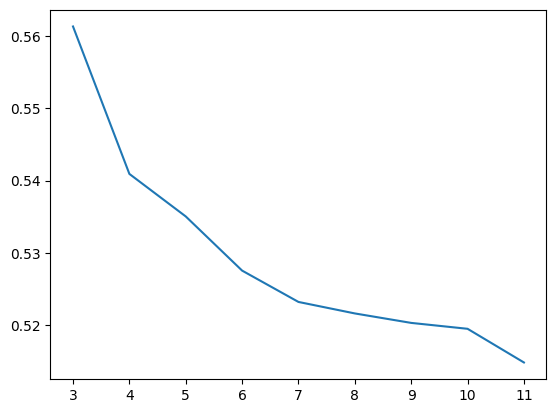

In [28]:
plt.plot(list(range(3,12)), l)

In [29]:
max_precision = max(l)
max_precision
k = l.index(max_precision) + 3
print(f'The correct parameter k is {k}')

The correct parameter k is 3


### 5. ACP

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [25]:
df_numerical = df_1.select_dtypes(include=[np.number])
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_numerical)

In [26]:
# Create PCA
pca = PCA()

# Adjust model and apply to normalized data
pca_result = pca.fit_transform(df_normalized)

[0.34589827 0.16220429 0.11671571 0.09519246 0.07943891 0.06956491
 0.05219755 0.0395777  0.02768374 0.01152646]


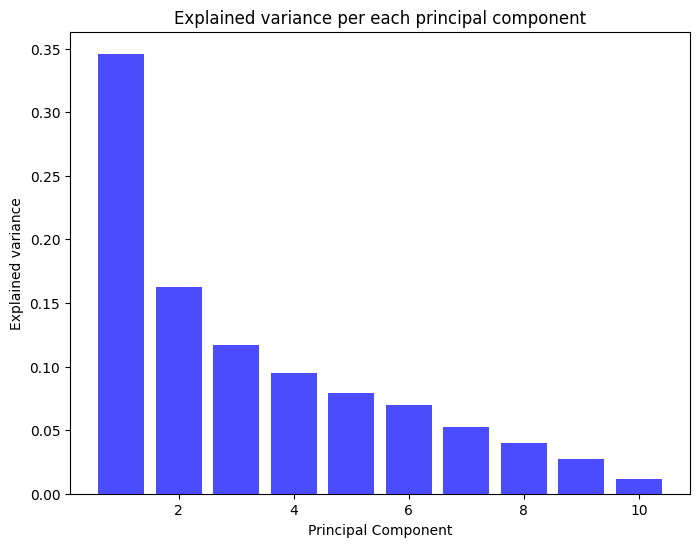

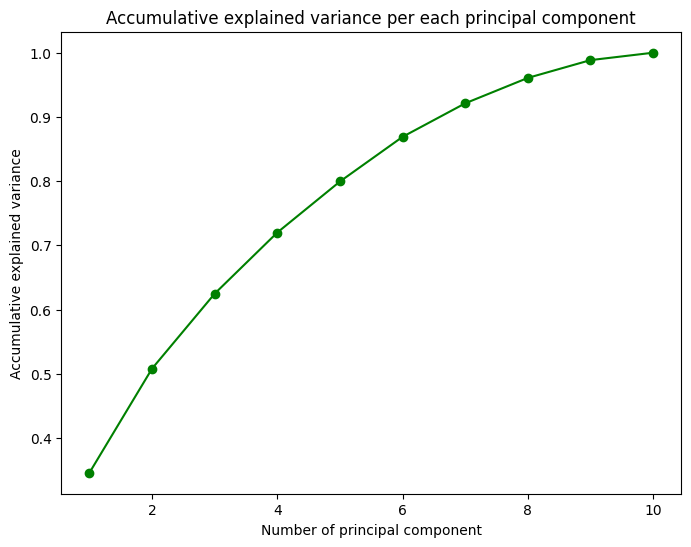

In [27]:
# Visualize the varianze explained per variable
explained_variance = pca.explained_variance_ratio_
print(explained_variance)


plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Explained variance')
plt.title('Explained variance per each principal component')
plt.show()

# Accumulative percentage:
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='green')
plt.xlabel('Number of principal component')
plt.ylabel('Accumulative explained variance')
plt.title('Accumulative explained variance per each principal component')
plt.show()


In [28]:
pca = PCA(n_components=0.90)  # Mantener componentes que expliquen el 90% de la varianza
pca_result = pca.fit_transform(df_normalized)

print(f'Número de componentes seleccionados: {pca.n_components_}')

Número de componentes seleccionados: 7


- Apply a ML Model: **Logistic Regression**

In [29]:
X = pca_result
X
y = df_1['popularity_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Model: Logistic Regression

from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(max_iter=1000)

# Adjust the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.5300461918573424
Classification Report:


c:\Users\Carlota\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Carlota\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Carlota\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score   support

        High       0.00      0.00      0.00       624
         Low       0.53      0.66      0.59     21388
      Medium       0.50      0.52      0.51     15285
         Top       0.00      0.00      0.00        25
    Very Low       0.66      0.29      0.40      9223

    accuracy                           0.53     46545
   macro avg       0.34      0.29      0.30     46545
weighted avg       0.54      0.53      0.52     46545

Confusion Matrix:
[[    0   161   459     0     4]
 [    0 14087  6072     0  1229]
 [    0  7222  7914     0   149]
 [    0     4    21     0     0]
 [    0  5298  1255     0  2670]]


- Apply other ML Model: **Random Forest**

In [38]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)


model_rf.fit(X_train, y_train)


y_pred_rf = model_rf.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy Random Forest: {accuracy_rf}")
print("Classification Report Random Forest:")
print(classification_report(y_test, y_pred_rf))


Accuracy Random Forest: 0.7229347942851004
Classification Report Random Forest:
              precision    recall  f1-score   support

        High       0.96      0.74      0.84       624
         Low       0.69      0.80      0.74     21388
      Medium       0.78      0.79      0.78     15285
         Top       0.89      0.68      0.77        25
    Very Low       0.70      0.44      0.54      9223

    accuracy                           0.72     46545
   macro avg       0.81      0.69      0.74     46545
weighted avg       0.72      0.72      0.72     46545



In [30]:
pip install  xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 2.4/124.9 MB 12.2 MB/s eta 0:00:11
   - -------------------------------------- 5.0/124.9 MB 12.5 MB/s eta 0:00:10
   -- ------------------------------------- 7.9/124.9 MB 12.8 MB/s eta 0:00:10
   --- ------------------------------------ 10.7/124.9 MB 13.0 MB/s eta 0:00:09
   ---- ----------------------------------- 13.6/124.9 MB 13.1 MB/s eta 0:00:09
   ----- ---------------------------------- 16.5/124.9 MB 13.2 MB/s eta 0:00:09
   ------ --------------------------------- 19.4/124.9 MB 13.2 MB/s eta 0:00:08
   ------- -------------------------------- 22.5/124.9 MB 13.3 MB/s eta 0:00:08
   -------- ------------------------------- 25.2/124.9 MB 13.4 MB/s eta 0:00:08
   -------- ------------------------------- 28.0/124.9 MB 13.4 MB/s eta 0:00:08
   --------- ------------------------------ 31.2/124.9 MB 13.5 MB/s eta 0:00:07
   ---------- ----------------------------- 34.1/124

In [31]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Definir el modelo base
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    "max_depth": [3, 4, 5],        # Profundidad máxima del árbol
    "learning_rate": [0.01, 0.1, 0.3],  # Tasa de aprendizaje
    "n_estimators": [50, 100, 200],     # Número de árboles
    "subsample": [0.8, 1.0],       # Proporción de datos usados por árbol
    "colsample_bytree": [0.8, 1.0],  # Proporción de características usadas por árbol
    "gamma": [0, 0.1, 0.2],        # Reducción mínima en la pérdida para dividir un nodo
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="accuracy",          # Métrica de evaluación
    cv=3,                        # Validación cruzada (3 particiones)
    verbose=1,                   # Mostrar el progreso
    n_jobs=-1                    # Usar todos los núcleos disponibles
)

# Ajustar el GridSearchCV con los datos
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y el mejor resultado
print("Mejores Hiperparámetros:")
print(grid_search.best_params_)
print("\nMejor Precisión (Accuracy):")
print(grid_search.best_score_)


c:\Users\Carlota\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

 Improve the hyperparameters: 

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

In [ ]:


# Definir los hiperparámetros a probar (en este caso, probamos rangos o distribuciones)
param_dist = {
    'n_estimators': randint(50, 200),  # Rango para el número de árboles
    'max_depth': [None, 10, 20, 30, 40, 50],  # Profundidad de los árboles
    'min_samples_split': randint(2, 10),  # Número mínimo de muestras para dividir
    'min_samples_leaf': randint(1, 4),  # Número mínimo de muestras en una hoja
    'max_features': ['auto', 'sqrt', 'log2'],  # Número de características a considerar
    'bootstrap': [True, False]  # Si se usa muestreo con reemplazo
}

# Crear el clasificador RandomForest
rf = RandomForestClassifier(random_state=42)

# Realizar la búsqueda de hiperparámetros con validación cruzada
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=100, cv=5, verbose=3, random_state=42, n_jobs=-1)

# Ajustar el modelo a los datos de entrenamiento
random_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

# Evaluar el modelo con los mejores hiperparámetros
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluar rendimiento
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
